# Loading MNIST and EMNIST data

In [ ]:
# MNIST -- (x_train, labels_train), (x_test, labels_test) y_train y_test
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)
#  dense layer
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convolution layer
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


# EMNIST -- (input_train, target_train), (input_test, target_test) y_train_emnist y_test_emnist
!pip install extra-keras-datasets
from extra_keras_datasets import emnist
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='digits')
# print(input_train.shape, target_train.shape)
# print(input_test.shape, target_test.shape)
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
input_train /= 255
input_test /= 255
from tensorflow.keras.utils import to_categorical
y_train_emnist = to_categorical(target_train, 10)
y_test_emnist = to_categorical(target_test, 10)
#  dense layer
input_train = input_train.reshape(240000, 784)
input_test = input_test.reshape(40000, 784)
# convolution layer
input_train = input_train.reshape(input_train.shape[0], 28, 28, 1)
input_test = input_test.reshape(input_test.shape[0], 28, 28, 1)


INFO:root:Loading dataset = emnist


# Defining neural network

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import Flatten, Lambda, BatchNormalization
from keras.regularizers import l2


# different layers https://keras.io/layers/  e.g.:
net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(rate=0.5))
net.add(Dense(10, activation='softmax'))
net.compile(loss='categorical_crossentropy', optimizer='adam')

net.summary()
# Check total parameters

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_23 (Dense)            (None, 256)             

#  Training neural network

In [ ]:
# epochs = number of epochs to train the model (an epoch is an iteration over the entire x and y data provided)
# Batch size = numbers of samples per gtadient update
# 一个 epoch 表示一次全量训练样例的前向和后向传播。batch_size 就是在一次前向／后向传播过程用到的训练样例的数量
batch_size = 256
num_epoch = 10
# history = net.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=num_epoch)
history = net.fit(input_train, y_train_emnist, validation_data=(input_test, y_test_emnist), batch_size=batch_size, epochs=num_epoch)

Epoch 1/10
938/938 [==============================] - 150s 160ms/step - loss: 0.0109 - val_loss: 0.0174
Epoch 2/10
938/938 [==============================] - 151s 161ms/step - loss: 0.0103 - val_loss: 0.0172
Epoch 3/10
938/938 [==============================] - 151s 161ms/step - loss: 0.0090 - val_loss: 0.0175
Epoch 4/10
938/938 [==============================] - 150s 160ms/step - loss: 0.0090 - val_loss: 0.0180
Epoch 5/10
938/938 [==============================] - 151s 161ms/step - loss: 0.0083 - val_loss: 0.0193
Epoch 6/10
938/938 [==============================] - 151s 161ms/step - loss: 0.0082 - val_loss: 0.0208
Epoch 7/10
938/938 [==============================] - 151s 161ms/step - loss: 0.0079 - val_loss: 0.0199
Epoch 8/10
938/938 [==============================] - 149s 159ms/step - loss: 0.0073 - val_loss: 0.0201
Epoch 9/10
938/938 [==============================] - 150s 160ms/step - loss: 0.0072 - val_loss: 0.0216
Epoch 10/10
938/938 [==============================] - 148s 158m

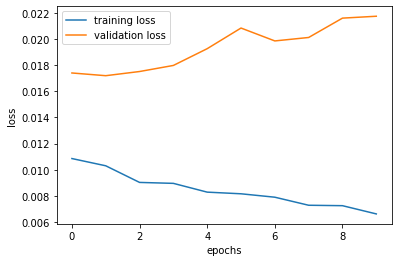

In [ ]:

# The history variable returned by the fit function can be used to produce a plot showing the
# change in the cost function during training:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# MNIST and EMNIST for testing

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model
# #load .h5 file of arbitrary name for testing (last if more than one)
# print(os.getcwd())
# for file in os.listdir(os.getcwd()):
#  if file.endswith(".h5"):
#  print(file)
#  net=load_model(file)
# net.summary()

#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
 netType='CNN'
else:
 netType='MLP'

#test with MNIST data
outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST= ',100*correct_classified/labels_test.size)
                       
#test with EMNIST data
outputs=net.predict(input_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==target_test)
print('Percentage correctly classified EMNIST=',100*correct_classified/target_test.size)


Percentage correctly classified MNIST=  98.98
Percentage correctly classified EMNIST= 99.6075


In [ ]:
import pandas as pd
pd.crosstab(target_test,labels_predicted,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,3989,1,1,0,1,1,3,0,3,1
1,0,3983,4,0,3,0,1,8,1,0
2,1,1,3982,7,1,2,0,3,2,1
3,0,0,6,3983,0,6,0,1,3,1
4,0,0,1,0,3985,0,2,3,1,8
5,3,1,0,8,0,3982,3,0,2,1
6,3,1,2,0,2,0,3991,0,1,0
7,1,0,3,2,5,0,0,3987,0,2
8,0,1,1,2,3,2,3,1,3980,7


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

net.save("network_for_mnist_datamounted.h5")


In [ ]:
# from tensorflow.keras.models import load_model
# net=load_model("network_for_mnist.h5")